# Importing Necessary Libraries

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")


!pip install mediapipe
# Clean up the notebook
clean_notebook()



Notebook cleaned.


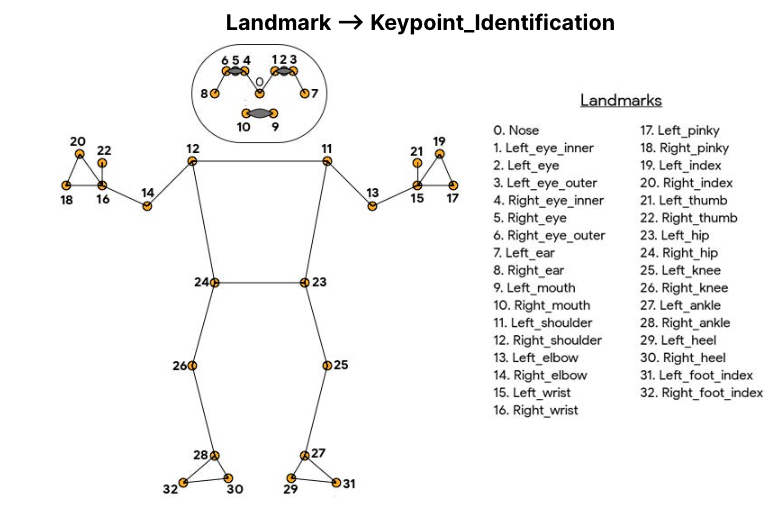

In [2]:
import matplotlib.pyplot as plt
from time import time
import mediapipe as mp
import cv2 as cv

# Init Project

In [8]:
mpPose = mp.solutions.pose
mpDraw = mp.solutions.drawing_utils

In [9]:
pose = mpPose.Pose(
    static_image_mode=True,
    min_detection_confidence=0.3,
    model_complexity=2
)

W0000 00:00:1732777705.476306    4585 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732777705.594664    4599 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [10]:
 landmark_keys = [landmark.name for landmark in mp_pose.PoseLandmark]
 landmark_keys

NameError: name 'mp_pose' is not defined

# Read & Perform

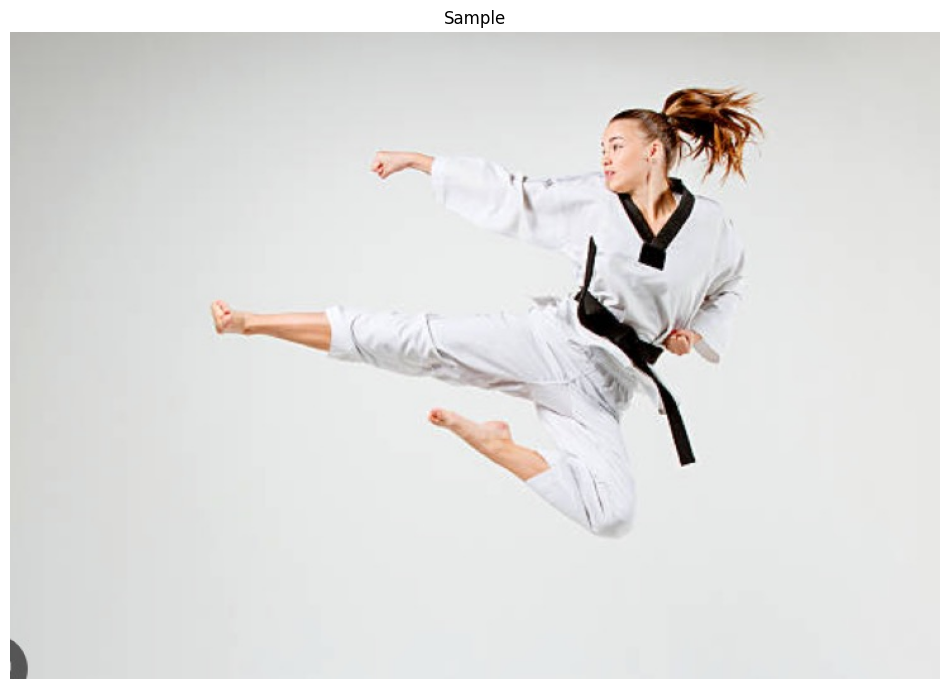

In [6]:
image = cv.imread('./Karate00.jpg')
plt.figure(figsize=[12, 12])
plt.title('Sample')
plt.axis('off')
plt.imshow(image[:, :, ::-1])
plt.show()

In [11]:
result = pose.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

for key, landmark in zip(landmark_keys, result.pose_landmarks.landmark):
    print(key,"x : ", landmark.x, "y:", landmark.y, "z:", landmark.z)


NameError: name 'landmark_keys' is not defined

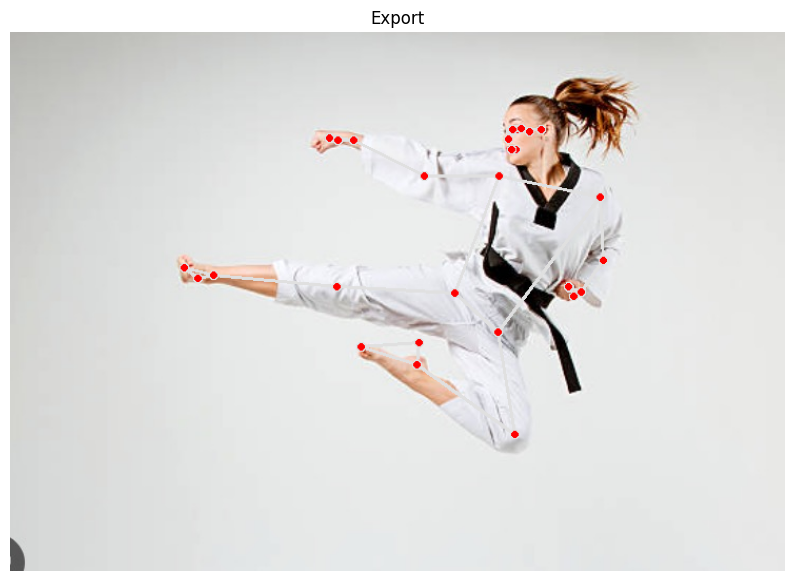

In [12]:
imagecopy = image.copy()

if result.pose_landmarks:
    mpDraw.draw_landmarks(
        image=imagecopy ,
        landmark_list=result.pose_landmarks,
        connections=mpPose.POSE_CONNECTIONS
    )
    fig = plt.figure(figsize=[10, 10])
    plt.title('Export')
    plt.axis('off')
    plt.imshow(imagecopy[:, :, ::-1])
    plt.show()

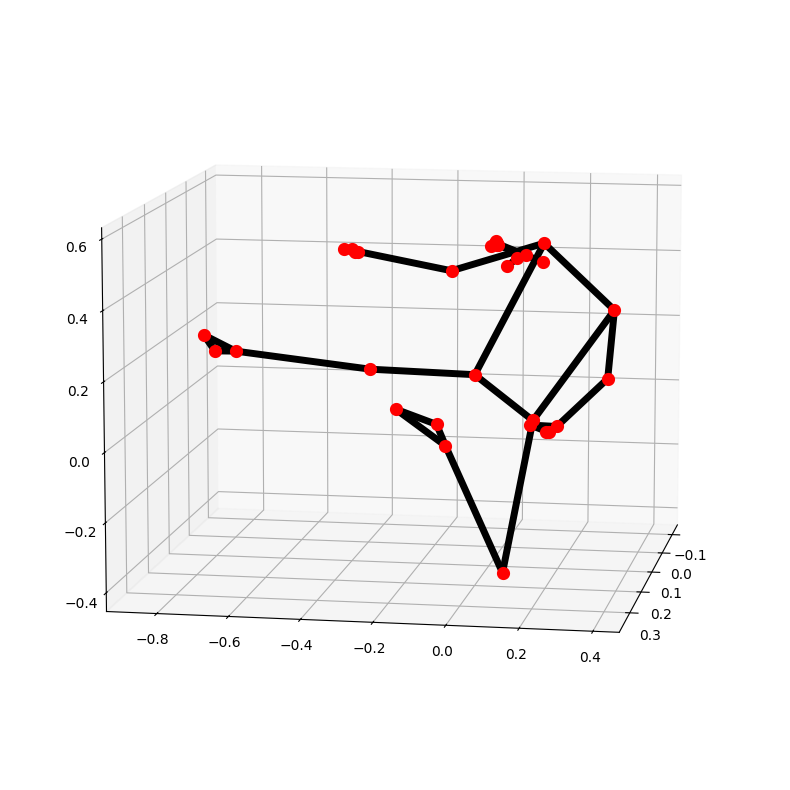

In [13]:
mpDraw.plot_landmarks(
    result.pose_world_landmarks,
    mpPose.POSE_CONNECTIONS
)

# How to Plot Multi images

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize MediaPipe Pose module
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# List of image paths
image_paths = ['Karate00.jpg', 'Karate01.jpg']  # Replace with your image paths

# Function to draw landmarks on an image
def draw_landmarks(image, landmarks):
    mp_drawing.draw_landmarks(image, landmarks, mp_pose.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

# Custom function to plot 3D landmarks
def plot_3d_landmarks(landmarks, ax):
    for landmark in landmarks.landmark:
        ax.scatter(landmark.x, landmark.y, landmark.z, color='blue')

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

# Iterate over each image path
for image_path in image_paths:
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        draw_landmarks(image, results.pose_landmarks)

        # Create a figure for subplots
        fig = plt.figure(figsize=(15, 5))

        # Create a subplot for the image
        ax_image = fig.add_subplot(1, 2, 1)
        ax_image.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax_image.title.set_text(f"Pose Landmarks: {image_path}")
        ax_image.axis('off')

        # Create a 3D subplot for the landmarks
        ax_3d = fig.add_subplot(1, 2, 2, projection='3d')
        plot_3d_landmarks(results.pose_landmarks, ax_3d)
        ax_3d.title.set_text("3D Pose Landmarks")

        plt.show()
    else:
        print(f"No pose landmarks detected in {image_path}.")

# Release resources
pose.close()


# Create Dataset 

In [ ]:
import cv2
import mediapipe as mp
import pandas as pd

# Initialize MediaPipe Pose module
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Load an image
image_path = 'Karate00.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Process the image and perform pose estimation
results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Check if landmarks were detected
if results.pose_landmarks:
    # Get the list of landmark keys
    landmark_keys = [landmark.name for landmark in mp_pose.PoseLandmark]

    # Prepare data for DataFrame
    pose_data = {}
    for key, landmark in zip(landmark_keys, results.pose_landmarks.landmark):
        pose_data[f'{key}_x'] = landmark.x
        pose_data[f'{key}_y'] = landmark.y
        pose_data[f'{key}_z'] = landmark.z
        pose_data[f'{key}_visibility'] = landmark.visibility

    # Create a DataFrame
    df = pd.DataFrame([pose_data])
  
   
else:
    print("No pose landmarks detected.")

# Release resources
pose.close()


In [ ]:
df

# Create Train Dataset for Multi images

In [ ]:
import cv2
import mediapipe as mp
import pandas as pd

# Initialize MediaPipe Pose module
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# List of image paths
image_paths = ['Karate00.jpg', 'Karate01.jpg']  # Replace with your image paths

# Initialize a list to store pose data for each image
all_pose_data = []

# Iterate over each image path
for image_path in image_paths:
    image = cv2.imread(image_path)
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.pose_landmarks:
        # Get the list of landmark keys
        landmark_keys = [landmark.name for landmark in mp_pose.PoseLandmark]

        # Prepare data for DataFrame
        pose_data = {'image_path': image_path}
        for key, landmark in zip(landmark_keys, results.pose_landmarks.landmark):
            pose_data[f'{key}_x'] = landmark.x
            pose_data[f'{key}_y'] = landmark.y
            pose_data[f'{key}_z'] = landmark.z
            pose_data[f'{key}_visibility'] = landmark.visibility

        # Append pose data to the list
        all_pose_data.append(pose_data)
    else:
        print(f"No pose landmarks detected in {image_path}.")

# Release resources
pose.close()

# Convert the list of pose data into a DataFrame
pose_df = pd.DataFrame(all_pose_data)


In [ ]:
pose_df

W0000 00:00:1732777593.123810    4228 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


# Yolo v8 pose estimation

https://alimustoofaa.medium.com/yolov8-pose-estimation-and-pose-keypoint-classification-using-neural-net-pytorch-98469b924525


https://alimustoofaa.medium.com/yolov8-pose-estimation-and-pose-keypoint-classification-using-neural-net-pytorch-98469b924525